# ROOT Tutorial No 3: Working With Monitor And Raw Data Files

Let's recap from the previous session:

- we did have a look at three runs at nominally 1 GeV energy
    - Run 17221**64897** is a +1 GeV/c muon beam 
    - Run 17221**72954** is a mixed -1 GeV/c beam with 8 mm of lead placed into the path of the beam to absorb the electrons in the beam (So that mostly pions and muons should remain in the beam)
    - Run 17221**78299** is also a mixed -1 GeV/c beam without the 8 mm lead absorber
    - To make things easier, we will label the data with the last five digits of the run - this will give us a nice time-ordering without us requiring to repeat all 10 digits of the run number

- we did have a look at the QDC data which will give us information about the amount of energy deposited in the scintillators `S2`, `S3` and a calorimeter `CAL17`


Lat time, we had a look at the monitor files. These contain ready-made histograms about the quantities we are interested in and are great for getting a quick overview about the data and to decide if a run is interesting or not. Let's plot the data from these three runs in a slightly different way to compare the results more effectively:

## Compare Results From QDC Monitor ROOT Files

**NOTE**: In order to make it easier for you to run the notebook on your computer or later at CERN, we will use a "common prefix" for the path to the data files. Please update this path so it points towards the directory where your local ROOT can find the files. 

In [1]:
import ROOT
import numpy as np 
from matplotlib import pyplot as plt

Welcome to JupyROOT 6.30/04


In [2]:
from pathlib import Path

# Use the path to where ROOT can find your local files
# it could for example be 
# path_to_datafiles = Path(r"/home/myusername/data")

# Here, we will be using the path to the central place where we store the data. The filesystem is called /eos, 
# there is a web service called "CERNbox" that can be used to access this file system. You will be using this 
# a lot here at CERN :-)

path_to_datafiles = Path(r"/eos/project/b/bl4s/Technics&Physics/2024/Data/T10July/2024/T10July/root")

In [3]:
# Read in all three QDC monitor files:

path_qdc_64897 = path_to_datafiles / Path(r"1722164897_QDC.root")
qdc_muons = ROOT.TFile.Open(str(path_qdc_64897.absolute()))

path_qdc_72954 = path_to_datafiles / Path(r"1722172954_QDC.root")
qdc_absorber = ROOT.TFile.Open(str(path_qdc_72954.absolute()))

path_qdc_78299 = path_to_datafiles / Path(r"1722178299_QDC.root")
qdc_no_absorber = ROOT.TFile.Open(str(path_qdc_78299.absolute()))

In [4]:
# This allows to interactively play with the plots - do not run this cell (or comment it out) in case you have issues with that
%jsroot

### Wait a second ... 

1) How do we know which channels of the QDC we have to get the histogram from?
=> Look at the signal table in the log book!

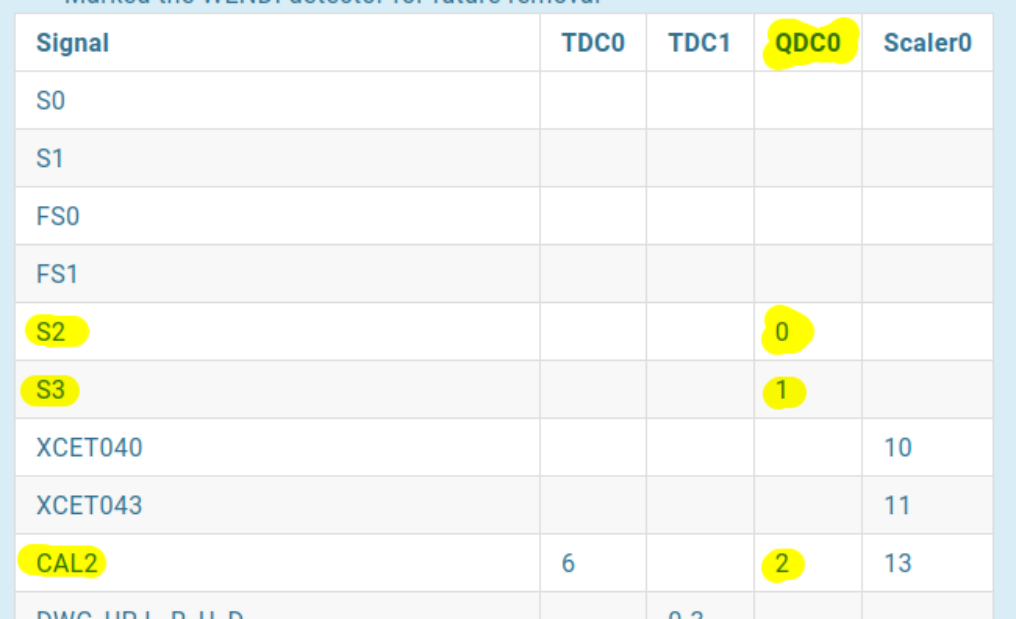

2) What are S2, S3 and CAL13 again?

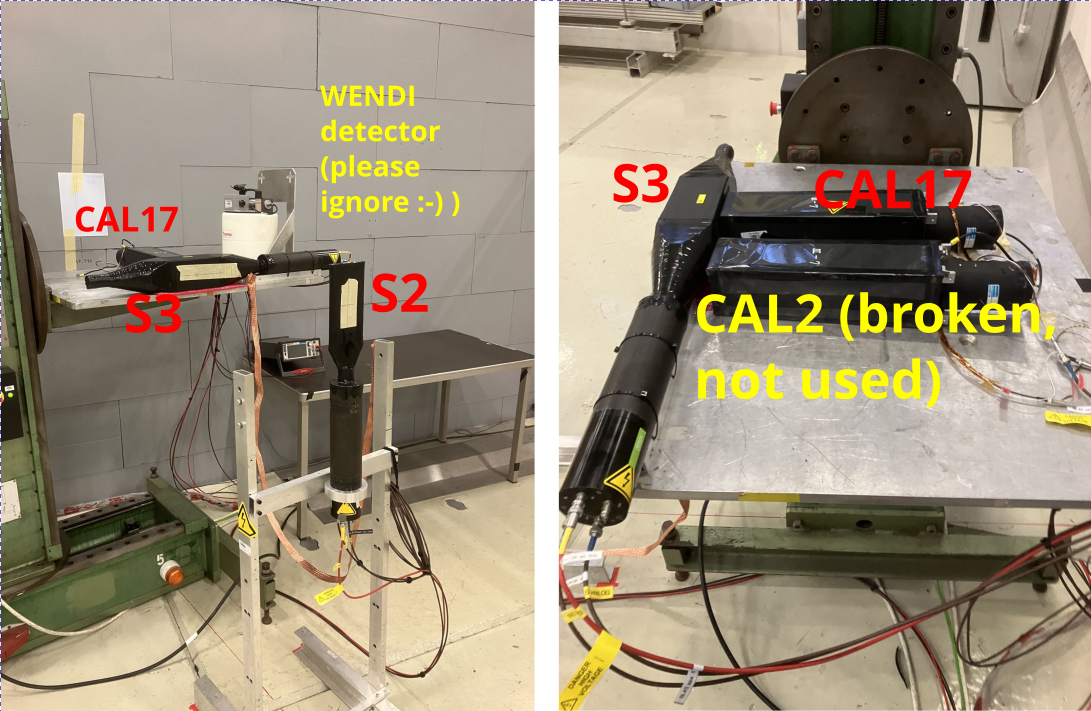


In [8]:
# Lets plot the three files, grouped by detector, next to each other:

# 1) create "Stacks" of histograms, we will use that to plot the data for S2, S3, and CAL17:
stack0 = ROOT.THStack("stack0", "S2 data")
stack1 = ROOT.THStack("stack1", "S3 data")
stack2 = ROOT.THStack("stack2", "CAL17 data")

# 2) Add the histograms to each stack:
# QDC data for S2 over all three runs
s2_muons = qdc_muons.Get("Histogramming/QDCMonitor/QDC0_ch00")
s2_muons.SetLineColor(2) # red line
s2_muons.SetTitle("+1 GeV/c muons")
stack0.Add(s2_muons)

s2_absorber = qdc_absorber.Get("Histogramming/QDCMonitor/QDC0_ch00")
s2_absorber.SetLineColor(9) # purple line
s2_absorber.SetTitle("-1 GeV/c mixed, absorber")
stack0.Add(s2_absorber)

s2_no_absorber = qdc_no_absorber.Get("Histogramming/QDCMonitor/QDC0_ch00")
s2_no_absorber.SetLineColor(8) # green line
s2_no_absorber.SetTitle("-1 GeV/c mixed, no absorber")
stack0.Add(s2_no_absorber)


# QDC data for S3 over all three runs
s3_muons = qdc_muons.Get("Histogramming/QDCMonitor/QDC0_ch01")
s3_muons.SetLineColor(2) # red line
s3_muons.SetTitle("+1 GeV/c muons")
stack1.Add(s3_muons)

s3_absorber = qdc_absorber.Get("Histogramming/QDCMonitor/QDC0_ch01")
s3_absorber.SetLineColor(9) # purple line
s3_absorber.SetTitle("-1 GeV/c mixed, absorber")
stack1.Add(s3_absorber)

s3_no_absorber = qdc_no_absorber.Get("Histogramming/QDCMonitor/QDC0_ch01")
s3_no_absorber.SetLineColor(8) # green line
s3_no_absorber.SetTitle("-1 GeV/c mixed, no absorber")
stack1.Add(s3_no_absorber)


# QDC data for CAL17 over all three runs
cal17_muons = qdc_muons.Get("Histogramming/QDCMonitor/QDC0_ch02")
cal17_muons.SetLineColor(2) # red line
cal17_muons.SetTitle("+1 GeV/c muons")
stack2.Add(cal17_muons)

cal17_absorber = qdc_absorber.Get("Histogramming/QDCMonitor/QDC0_ch02")
cal17_absorber.SetLineColor(9) # purple line
cal17_absorber.SetTitle("-1 GeV/c mixed, absorber")
stack2.Add(cal17_absorber)

cal17_no_absorber = qdc_no_absorber.Get("Histogramming/QDCMonitor/QDC0_ch02")
cal17_no_absorber.SetLineColor(8) # green line
cal17_no_absorber.SetTitle("-1 GeV/c mixed, no absorber")
stack2.Add(cal17_no_absorber)


# 3) Createa a canvas with three "sections", one for each of the detectors S2, S3 and CAL17
c0 = ROOT.TCanvas("c0", "Comparison over all three runs, grouped by detector", 10, 10, 1200, 1200)
c0.Divide(2, 2)
c0.cd(1)


stack0.Draw("nostack")
stack0.GetXaxis().SetTitle("QDC count")
stack0.GetYaxis().SetTitle("#Occurances")
stack0.GetXaxis().SetLimits(200, 1400)

c0.cd(2)
stack1.Draw("nostack")
stack1.GetXaxis().SetTitle("QDC count")
stack1.GetYaxis().SetTitle("#Occurances")
stack1.GetXaxis().SetLimits(200, 1400)

c0.cd(3)
stack2.Draw("nostack")
stack2.GetXaxis().SetTitle("QDC count")
stack2.GetYaxis().SetTitle("#Occurances")
stack2.GetXaxis().SetLimits(200, 1400)

# 4) Create a legend
c0.cd(4)
leg = ROOT.TLegend(0.1, 0.1, 0.9, 0.9, "Legend")
leg.AddEntry(s2_muons, "1722164897: +1 GeV muons")
leg.AddEntry(s2_absorber, "1722172954: -1 GeV mixed, absorber")
leg.AddEntry(s2_no_absorber, "1722178299: -1 GeV mixed, no absorber")
leg.SetTextSize(0.04)
leg.Draw()

c0.Update()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


In [7]:
# c0.Draw()

### Some Notes, Observations And Comments

1) Instead of copy pasting the code that sets up the canvas and draws the histograms, it may be a good idea to define a helper function that takes this over and allows to reuse the code

2) For S2 and S3, the data looks somewhat similar, the main difference (at least according to the Landau distribution) seems to be the amplitude. For the Cal17, the distribution looks very much differently - the interaction with the lead crystal is not comparable to the interaction of the beam with the plastic scintillator!

3) We have only looked at the resulting histogram. As such, we have no idea which particles contributed to which part of the distribution (and if the green and the blue curve would become more similar if we would, for example, "filter" out the electrons from the green distribution, similar to what we do with an absorber).

**POSSIBLE TODO**:
In case you want to try something yourself, maybe you can create a different summary plot, where we compare the results of all three detectors S2, S3 and CAL17 in one histogramm per run?

## Working with Raw Data Files

Let's have a look at the **raw data** file for run ´1722178299´ which contains the results from the green curves above:

In [9]:
path_no_abs = path_to_datafiles / Path("1722178299.root")
raw_no_absorber = ROOT.TFile(str(path_no_abs.absolute()))

In [10]:
raw_no_absorber.ls()

TFile**		/eos/project/b/bl4s/Technics&Physics/2024/Data/T10July/2024/T10July/root/1722178299.root	
 TFile*		/eos/project/b/bl4s/Technics&Physics/2024/Data/T10July/2024/T10July/root/1722178299.root	
  KEY: TTree	RAWdata;1	BL4S RAW data tree
  KEY: TTree	RECOdata;1	BL4S RECO data tree


We have two trees in this root file:
- the "RAW data tree" containing, and you will never guess it, the raw data
- the "RECO tree" which contains "reconstructed" data

the RECO tree is similar in idea to the data we got from the monitor files (i.e., it's mostly graphs and histograms) but the plots and graphs in this section are created from a different part in our software. We would recommend to use the monitor files in case you need to take an overview instead of using the RECO tree.

In [11]:
rawdata = raw_no_absorber.Get("RAWdata")

Beforew we dive into the ROOT "Rawdata" tree, let's briefly talk about some structures and some ideas regarding ROOT:

- ROOT heavily uses a "tree" metaphor. 
    - Different data channels (and different ways to look at the same data) are organised in **branches** (think of this as the columns in a spreadsheet or the attributes in a database)
    - The data stored in the branches are called **leaves** (think of these as the values that you fill into a spreadsheet or into a database)
    
- Every time our Software receives a trigger pulse, a new **event** is created. What we call event, ROOT calls an **entry**
    - The data belonging to one event is grouped together using the ID of the event/entry. Think of this as the rows in a spreadsheet or the entries in a database
    - The main purpose of running a DAQ system like ours is to 
        - fetch data from different sources
        - group the sources together based upon the event ID / entry number
        - store the data in this structured fashion to disk
        - grouping things together by event/entry is called **event building**.
    
- There are further structures and concepts (Chains, Baskets, Series, etc.)
    - But we will happily ignore those concepts until a later time (if we need them).


So, for a simple tree with only three branches `A`, `B`, and `C`, the picture could look a little bit like this:

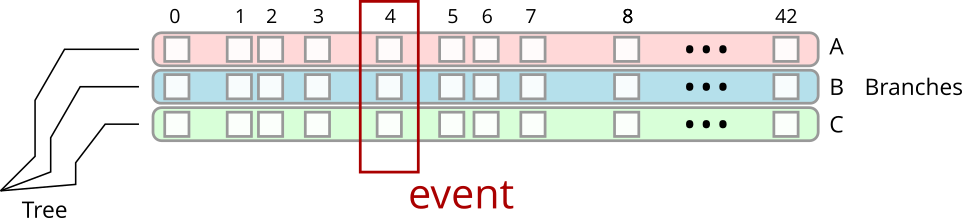


The data structures that ROOT can handle can be a lot more complicated. But our case already looks a little bit like the picture above (at least if we limit ourselves to the branches that we are actually interested in)

In [12]:
rawdata.Print()

******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :    56630 : Total =       107036799 bytes  File  Size =    5639581 *
*        :          : Tree compression factor =  19.11                       *
******************************************************************************
*Br    0 :QDC0_ch0  : QDC0_ch0/i                                             *
*Entries :    56630 : Total  Size=     227641 bytes  File Size  =     108979 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   2.08     *
*............................................................................*
*Br    1 :QDC0_ch0_OF : QDC0_ch0_OF/b                                        *
*Entries :    56630 : Total  Size=      57295 bytes  File Size  =        474 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 119.81     *
*...................................................

That is again quite a lot. Let's zoom in a bit and have a look at QDC channel 0. In total there are four branches associated with each channel of a QDC (and we have 32 channels on the QDC, so in total 128 branches for all the QDC data). For ch0, these four branches are:

```
*Br    0 :QDC0_ch0  : QDC0_ch0/i                                             *
*Entries :    56630 : Total  Size=     227641 bytes  File Size  =     108979 *
*Baskets :        8 : Basket Size=      32000 bytes  Compression=   2.08     *
*............................................................................*
*Br    1 :QDC0_ch0_OF : QDC0_ch0_OF/b                                        *
*Entries :    56630 : Total  Size=      57295 bytes  File Size  =        474 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 119.81     *
*............................................................................*
*Br    2 :QDC0_ch0_UT : QDC0_ch0_UT/b                                        *
*Entries :    56630 : Total  Size=      57295 bytes  File Size  =        474 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 119.81     *
*............................................................................*
*Br    3 :QDC0_ch0_valid : QDC0_ch0_valid/b                                  *
*Entries :    56630 : Total  Size=      57313 bytes  File Size  =        480 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 118.33     *
*............................................................................*
```

- Branch No 0 contains the QDC counts for ch0 of the QDC. The datatype is "integer" (see the`/i` at the end of `QDC0_ch0/i`) which makes sense since the QDC is essentially a counter that can count from 0 t 4095 (the higher the count, the higher the deposited energy)

- Branch No 1 and 2 contain information if an entry was overflowing the range from above (OF) or from below (UT). The data type is `bool` because it is a `true` or `false` type of information

- Branch No 3 contains a flag about whether the data was legal, again in the form of a binary flag.

- Note that every branch contains the same number of entries (events) `56630` => compare to the log book how many entries there should be in the data file!

**SO** By iterating through the data stored in the `QDC0_ch0`, `QDC0_ch1`, and `QDC0_ch2` branches, we could try to recreate the histograms that we got from the monitor file:

In [13]:
num_bins = 100
s2_no_absorber_hist = ROOT.TH1I("s2_no_absorber_hist", "S2, -1 GeV mixed beam, No absorber", num_bins, 0, 4096)
s3_no_absorber_hist = ROOT.TH1I("s3_no_absorber_hist", "S3, -1 GeV mixed beam, No absorber", num_bins, 0, 4096)
cal17_no_absorber_hist = ROOT.TH1I("cal17_no_absorber_hist", "CAL 17, -1 GeV mixed beam, No absorber", num_bins, 0, 4096)

In [14]:
num_events = rawdata.GetBranch("QDC0_ch0").GetEntries()
print(f"Number of events recorded: {num_events}")

Number of events recorded: 56630


In [15]:
for ev_id in range(0, num_events):
    rawdata.GetEntry(ev_id) # Move ot entry with id ev_id 
    s2_cnt = int(getattr(rawdata, "QDC0_ch0"))
    s2_no_absorber_hist.Fill(s2_cnt)
    
    s3_cnt = int(getattr(rawdata, "QDC0_ch1"))
    s3_no_absorber_hist.Fill(s3_cnt)
    
    cal17_cnt = int(getattr(rawdata, "QDC0_ch2"))
    cal17_no_absorber_hist.Fill(cal17_cnt)  

In [18]:
stack3 = ROOT.THStack("stack3", "S2, S3, and CAL17 data for Run 1722178299")

s2_no_absorber_hist.SetLineColor(210)
s2_no_absorber_hist.SetTitle("S2")
stack3.Add(s2_no_absorber_hist)


s3_no_absorber_hist.SetLineColor(92)
s3_no_absorber_hist.SetTitle("S3")
stack3.Add(s3_no_absorber_hist)

cal17_no_absorber_hist.SetLineColor(46)
cal17_no_absorber_hist.SetTitle("CAL17")
stack3.Add(cal17_no_absorber_hist)

# 3) Createa a canvas with three "sections", one for each of the detectors S2, S3 and CAL17
c1 = ROOT.TCanvas("c1", "S2, S3, and CAL17 data for Run 1722178299", 10, 10, 1200, 600)
c1.cd(1)

stack3.Draw("nostack")
stack3.GetXaxis().SetTitle("QDC count")
stack3.GetYaxis().SetTitle("#Occurances")
stack3.GetXaxis().SetLimits(200, 1400)

leg = ROOT.TLegend(0.7, 0.7, 0.97, 0.974, "Legend")
leg.AddEntry(s2_no_absorber_hist, "S2")
leg.AddEntry(s3_no_absorber_hist, "S3")
leg.AddEntry(cal17_no_absorber_hist, "CAL17")
leg.Draw()

c1.Update()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [17]:
# c1.Draw()

### Questions 

1) Why does the histogramm look different to before?
2) How could we try to recreate the original histogram from the raw data?
3) Can you try to filter out entries before filling the values into the histogramm(s)?

## Next Time:

- We will have a look at combining the QDC data with data for the Cherenkov detectors
- We will try to understand the difference between data stored by the TDCs and the Scalers
- We may have a brief look at the DWC data